# Workshop 9 - CNN

Code for workshop 9.  This will use Keras (within tensorflow v2) to build a small CNN network. 

By Hu Wang.

In [27]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split

# Common imports
import numpy as np
import os, time
import pandas as pd

# Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

In [2]:
# Check the versions are OK (both should be 2 or more)
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


## Simple CNN Network Code with Keras

We will use the keras version built into tensorflow version 2.
It is remarkably simple for building, training and evaluating networks.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same",
                               input_shape=[32, 32, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.AveragePooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.AveragePooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 8, 8, 32)         0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 64)         0

## Load data
We will use MNIST, which is a set of small images (28x28) that contain 10 different digital items - see below for class names and an example image.

In [28]:
# This is a built-in data for keras, so easily accessible
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [29]:
# Let's see how big it is
print(X_train_full.shape)
print(X_test.shape)
n_total = X_train_full.shape[0]

(60000, 28, 28)
(10000, 28, 28)


In [30]:
# Reshape into 4D (as CNNs require each sample to be XSIZE x YSIZE x CHANNELS) and also do pre-processing (divide by 255)
NSAMP,XSIZE,YSIZE = X_train_full.shape
X_train_full = X_train_full.reshape([NSAMP,XSIZE,YSIZE,1])/255.0
X_test = X_test.reshape([-1,XSIZE,YSIZE,1])/255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size =0.2, stratify = y_train_full)

In [33]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


float64
float64
7


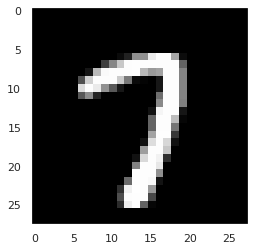

In [38]:
class_names = np.array([ "0", "1" , "2" , "3" , "4" , "5" , "6" , 
               "7" , "8" , "9" ])

# Inspect some aspects of the data (in general, you should play around with the data 
#                                   more than this to get a feel for it)
# Check that scaled types are appropriate
print(X_train.dtype)
print(X_valid.dtype)
# Look at first item
print(class_names[y_train[0]])
plt.imshow(X_train[0,:,:,0], cmap='gray')
plt.grid(False)
plt.show()

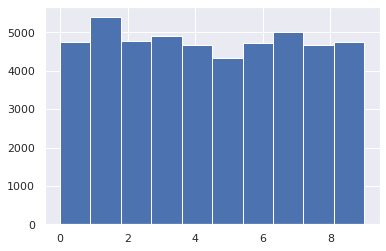

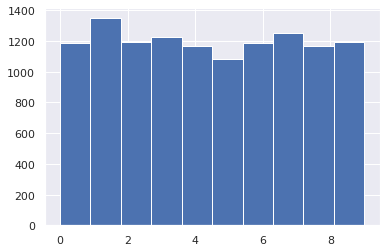

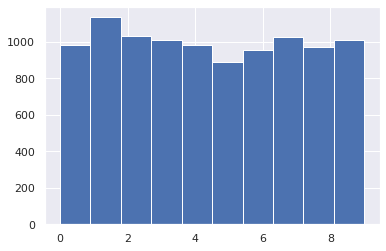

In [31]:
# Let's look at the distribution of labels in the training, validation and test sets
plt.hist(y_train)
plt.show()
plt.hist(y_valid)
plt.show()
plt.hist(y_test)
plt.show()

## Simple CNN Network Code with Keras

We will use the keras version built into tensorflow version 2.
It is remarkably simple for building, training and evaluating networks.

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same",
                               input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.AveragePooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.AveragePooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation = "softmax"))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 average_pooling2d_2 (Averag  (None, 7, 7, 32)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 average_pooling2d_3 (Averag  (None, 3, 3, 64)        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
48/48 [==============================] - 46s 940ms/step - loss: 0.5496 - accuracy: 0.8397 - val_loss: 0.1399 - val_accuracy: 0.9562
Epoch 2/10
48/48 [==============================] - 45s 949ms/step - loss: 0.0978 - accuracy: 0.9704 - val_loss: 0.0870 - val_accuracy: 0.9721
Epoch 3/10
48/48 [==============================] - 46s 958ms/step - loss: 0.0649 - accuracy: 0.9799 - val_loss: 0.0598 - val_accuracy: 0.9817
Epoch 4/10
48/48 [==============================] - 45s 939ms/step - loss: 0.0503 - accuracy: 0.9837 - val_loss: 0.0508 - val_accuracy: 0.9851
Epoch 5/10
48/48 [==============================] - 45s 947ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0504 - val_accuracy: 0.9838
Epoch 6/10
48/48 [==============================] - 45s 947ms/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 7/10
48/48 [==============================] - 45s 936ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0513 - val_accuracy: 0.9842

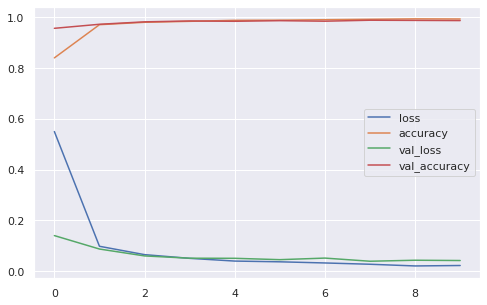

In [43]:
# model training
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.01), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))